**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Clase 12 -  Optimizacion de funciones aplicados a la gestión**


En este ejemplo Real vamos a analizar el mercado farmaceutico en remedios oncologicos. ¿Será este un monopolio - duopolio - Oligopolio - o habra competencia perfecta?

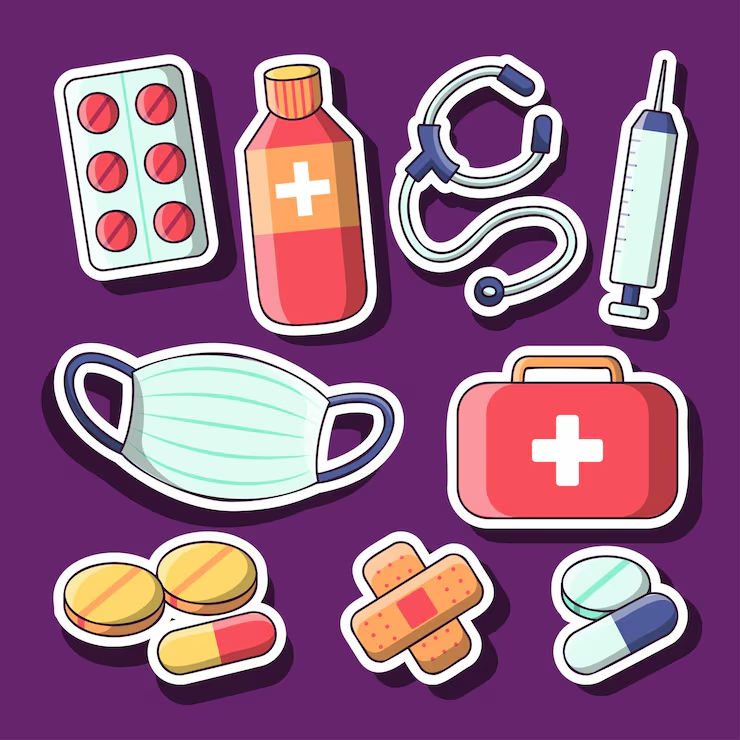

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vamos a analizar una base de datos extraida de la pagina

 https://datos.gob.ar/

 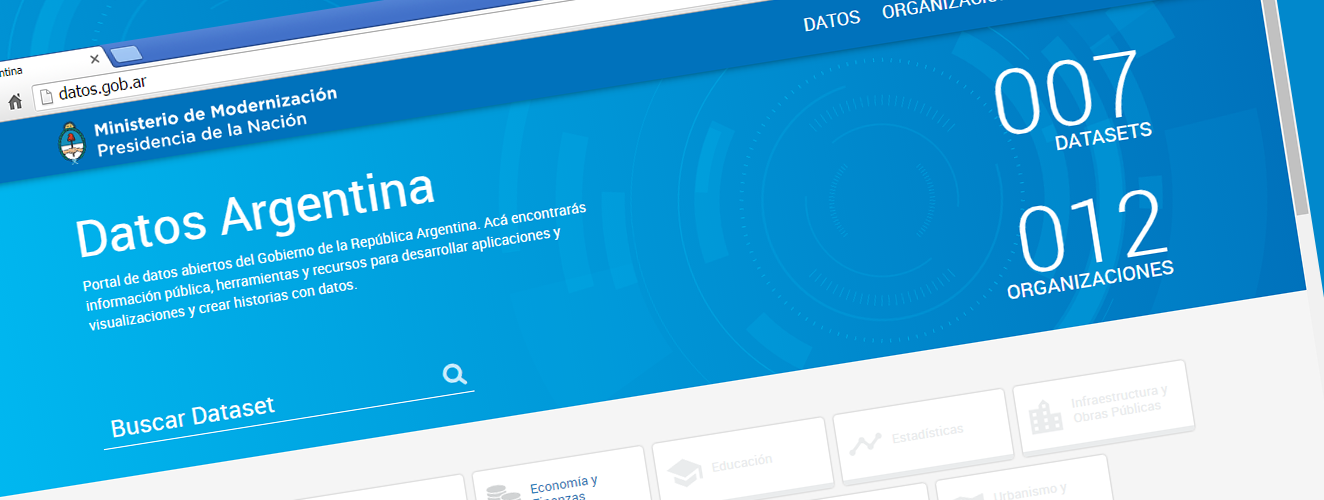







A continuacion dejo el link de donde obtuve esta base

https://www.datos.gob.ar/dataset/pami-listado-precios-medicamentos-para-entidades

https://www.datos.gob.ar/dataset/pami-listado-precios-medicamentos-para-afiliados


Arrancamos con afiliados al PAMI

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Labo/Material support /afiliados20250901_091308.xlsx')
df.head()


,DROGA,MARCA,PRESENTACION,LABORATORIO,COBERTURA,COPAGO
0,aceite de pescado,OMACOR,caps.blandas x 28,Richmond,50%,$ 2483.68
1,aceite de salmón,REGULIP,1 g cáps.x 60,Adium,40%,$ 33329.51
2,aceite de salmón,REGULIP,1 g cáps.x 90,Adium,40%,$ 48524.29
3,acenocumarol,SINTROM,1 mg comp.x 20,Siegfried,80%,$ 700.32
4,acenocumarol,ACENOCOUMAROL ROSPAW,4 mg comp.x 20,Rospaw,80%,$ 2091.91


In [ ]:
df_to = df.drop(columns=['PRESENTACION', 'LABORATORIO', 'COBERTURA', 'COPAGO']).copy()
df_to.head()
df_to.to_json('/content/drive/MyDrive/Labo/Material support /afiliados.json', orient='records', lines=True)


#Recordando Elasticidades

Recordemos que nosotros teniamos elasticidad precio demanda de caracter inelastico cuando analizamos bienes muy escenciales los cuales es dificil que los podamos sustituir por otro. Es por ello que yo al no ser medico consulte con chatgpt cual/cuales de todos los medicamentos eran de enfermedades dificiles de tratar.

Su respuesta fue interesante y me arrojo que el metotrexato es un medicameto escencial en tratamientos oncologicos especificamente Leucemia en grandes rasgos.

¿Que es el Metotrexato?

*   inmunosupresor antagonista del ác. fólico. Interfiere en procesos de síntesis de ADN, reparación y replicación celular; puede disminuir el desarrollo de los tejidos malignos sin daño irreversible en tejidos normales.




In [ ]:
# Filtrar solo los registros con Metotrexato
df_metotrexato = df_to[df_to["DROGA "].str.lower() == "metotrexato"]

df_metotrexato


,DROGA,MARCA
5161,metotrexato,ARTRAIT
5162,metotrexato,ERVEMIN
5163,metotrexato,ARTRAIT
5164,metotrexato,ARTRAIT
5165,metotrexato,ERVEMIN
5166,metotrexato,ARTRAIT SC
5167,metotrexato,ARTRAIT
5168,metotrexato,ARTRAIT
5169,metotrexato,ERVEMIN
5170,metotrexato,ARTRAIT


from matplotlib import pyplot as plt
import seaborn as sns
df_metotrexato.groupby('MARCA ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

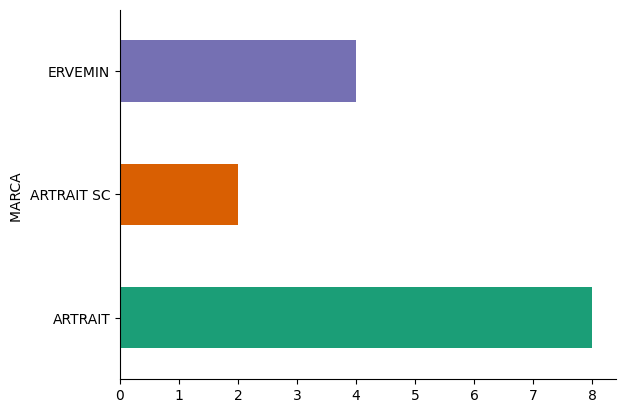

In [ ]:
#Plot
df_metotrexato.groupby('MARCA ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) #df_metotrexato.groupby('MARCA ').size() --> Agrupa por Marca la columna y se fija el tamaño. .plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) --> Plot
plt.gca().spines[['top', 'right',]].set_visible(False)

Vemos que el medicamento en principio corresponde a tres marcas diferentes de las cuales dos de ellas se llaman medio parecido 🤔

Sigamos investigando: ahora no nos limitemos solo a la droga y su marca miremos el laboratorio.

In [ ]:
df_metotrexato1 = df[df["DROGA "].str.lower() == "metotrexato"]
df_metotrexato1.to_json(r'/content/drive/MyDrive/Labo/Material support /afiliados_metotrexato.json', orient='records', lines=True)
df_metotrexato1

,DROGA,MARCA,PRESENTACION,LABORATORIO,COBERTURA,COPAGO
5161,metotrexato,ARTRAIT,10 mg comp.ran.x 10,Trb-Pharma,50%,$ 6241.94
5162,metotrexato,ERVEMIN,10 mg comp.x 10,Teva Argentina,50%,$ 6009.69
5163,metotrexato,ARTRAIT,15 mg comp.ran.x 4,Trb-Pharma,50%,$ 6049.86
5164,metotrexato,ARTRAIT,15 mg comp.ran.x 8,Trb-Pharma,50%,$ 9579.18
5165,metotrexato,ERVEMIN,15 mg comp.x 4,Teva Argentina,50%,$ 5730.29
5166,metotrexato,ARTRAIT SC,15 mg f.a.x 4,Trb-Pharma,50%,$ 10643.69
5167,metotrexato,ARTRAIT,15 mg f.a.x 5 x 2 ml,Trb-Pharma,50%,$ 2165.5
5168,metotrexato,ARTRAIT,2.5 mg comp.x 20,Trb-Pharma,50%,$ 3265.29
5169,metotrexato,ERVEMIN,2.5 mg comp.x 20,Teva Argentina,50%,$ 3277.61
5170,metotrexato,ARTRAIT,20 mg f.a.x 4,Trb-Pharma,50%,$ 2240.5


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('MARCA ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('LABORATORIO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MARCA ')):
  _plot_series(series, series_name, i)
  fig.legend(title='MARCA ', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('LABORATORIO')):
  _plot_series(series, series_name, i)
  fig.legend(title='LABORATORIO', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LABORATORIO'].value_counts()
    for x_label, grp in _df_6.groupby('MARCA ')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MARCA ')
_ = plt.ylabel('LABORATORIO')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['MARCA '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='MARCA ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['LABORATORIO'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='LABORATORIO', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

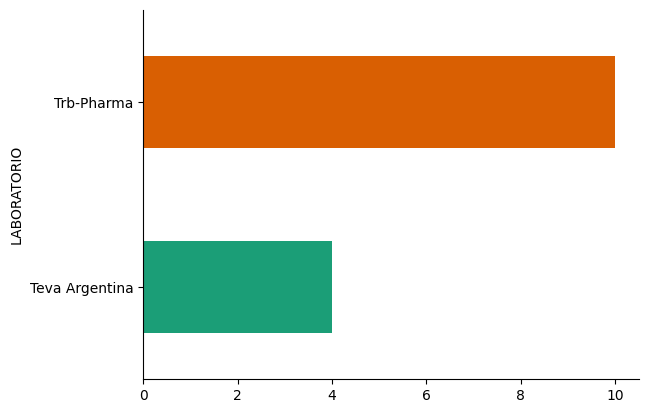

In [ ]:
#agrupando por laboratorio
_df_2.groupby('LABORATORIO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Ahora queda todo mucho mas claro, el mercado de este medicamento es controlado por dos laboratorios. Ahora esto es perjudicial, es bueno? Sigan viendo 📺

---
Repliquemos lo mismo para la gente que no esta en PAMI , para entidades.


In [ ]:
df_noafiliado = pd.read_csv(r'/content/drive/MyDrive/Labo/Material support /medicamentosnoafiliados.csv', sep=';', encoding='latin1')
df_noafiliado.head()




,ALFABETA,PRINCIPIO ACTIVO,MARCA COMERCIAL,PRESENTACION,LABORATORIO,PVP PAMI AL 01/09/2025,COBERTURA,IMPORTE AFILIADO
0,42415,betahistina,BETASERC,16 mg comp.x 30,Abbott EPD,$ 16083.05,50%,$ 8041.53
1,42416,betahistina,BETASERC,24 mg comp.x 30,Abbott EPD,$ 22322,50%,$ 11161
2,48040,betahistina,BETASERC,8 mg comp.x 30,Abbott EPD,$ 12486.19,50%,$ 6243.1
3,21735,candesartán cilexetil,TIADYL,16 mg comp.x 30,Abbott EPD,$ 54641.58,60%,$ 21856.63
4,21733,candesartán cilexetil,TIADYL,8 mg comp.x 30,Abbott EPD,$ 36433.17,60%,$ 14573.27


In [ ]:
df_noafiliado.columns

Index(['ALFABETA', 'PRINCIPIO ACTIVO', 'MARCA COMERCIAL', 'PRESENTACION',
       'LABORATORIO', 'PVP PAMI AL 01/09/2025', 'COBERTURA',
       'IMPORTE AFILIADO'],
      dtype='object')

In [ ]:
df_metotrexato1noafiliado = df_noafiliado[df_noafiliado["PRINCIPIO ACTIVO"].str.lower() == "metotrexato"]
df_metotrexato1noafiliado.to_json(r'/content/drive/MyDrive/Labo/Material support /no_afiliados_metotrexato.json', orient='records', lines=True)
df_metotrexato1noafiliado
df_metotrexato1.to_json(r'/content/drive/MyDrive/Labo/Material support /afiliados_metotrexato.json', orient='records', lines=True)

In [ ]:
df_noafiliado = df[df["DROGA "].str.lower() == "metotrexato"]
df_noafiliado.to_json(r'/content/drive/MyDrive/Labo/Material support /afiliados_metotrexato.json', orient='records', lines=True)
df_noafiliado

,DROGA,MARCA,PRESENTACION,LABORATORIO,COBERTURA,COPAGO
5161,metotrexato,ARTRAIT,10 mg comp.ran.x 10,Trb-Pharma,50%,$ 6241.94
5162,metotrexato,ERVEMIN,10 mg comp.x 10,Teva Argentina,50%,$ 6009.69
5163,metotrexato,ARTRAIT,15 mg comp.ran.x 4,Trb-Pharma,50%,$ 6049.86
5164,metotrexato,ARTRAIT,15 mg comp.ran.x 8,Trb-Pharma,50%,$ 9579.18
5165,metotrexato,ERVEMIN,15 mg comp.x 4,Teva Argentina,50%,$ 5730.29
5166,metotrexato,ARTRAIT SC,15 mg f.a.x 4,Trb-Pharma,50%,$ 10643.69
5167,metotrexato,ARTRAIT,15 mg f.a.x 5 x 2 ml,Trb-Pharma,50%,$ 2165.5
5168,metotrexato,ARTRAIT,2.5 mg comp.x 20,Trb-Pharma,50%,$ 3265.29
5169,metotrexato,ERVEMIN,2.5 mg comp.x 20,Teva Argentina,50%,$ 3277.61
5170,metotrexato,ARTRAIT,20 mg f.a.x 4,Trb-Pharma,50%,$ 2240.5


from matplotlib import pyplot as plt
_df_9['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('MARCA ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('LABORATORIO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MARCA ')):
  _plot_series(series, series_name, i)
  fig.legend(title='MARCA ', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('LABORATORIO')):
  _plot_series(series, series_name, i)
  fig.legend(title='LABORATORIO', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LABORATORIO'].value_counts()
    for x_label, grp in _df_15.groupby('MARCA ')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MARCA ')
_ = plt.ylabel('LABORATORIO')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['MARCA '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='MARCA ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['LABORATORIO'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='LABORATORIO', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

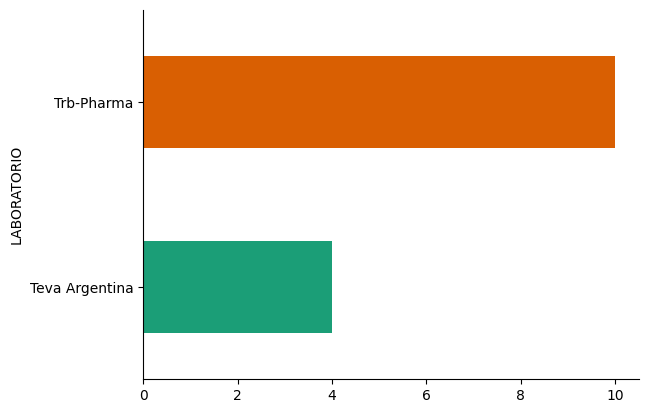

In [ ]:

_df_11.groupby('LABORATORIO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

En principio sucede lo mismo. Ahora una variable la cual no estamos teniendo en cuenta es el dinero que cuesta esta medicina.

Como bien se describe en la documentacion de la base de datos esta es del año 2020, estaria interesante calcular cuanta proporcion de la canasta le representa a una persona o familia los gastos en este medicamento.


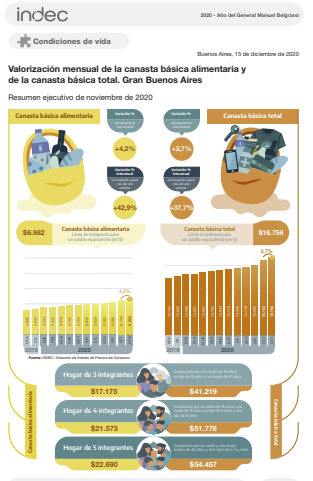

En el año 2020, el valor de la canasta básica total (CBT) para una familia tipo de cuatro integrantes era de $51.776.

* Una familia que supere ese monto no se considera pobre.

* Si sus ingresos se encuentran por encima de la canasta básica alimentaria (CBA) pero por debajo de la CBT, se clasifica como pobre.

* En cambio, si sus ingresos están por debajo de la CBA, se considera indigente.

Ahora debemos hacer dos cosas obtener cuanto representan los medicamentos en la canasta basica total y cual es precio de este medicamento para analizar si hay caso de abuso de precios.

Analicemos en un principio un proxy (enlace, o intermediario) para que nos diga cuanto pondera los medicamentos en la canasta, para ello agarramos el Indice de precios al consumidor y vemos cuanto representa en su analisis. Para ello importamos la base de datos

In [ ]:
df_IPC= pd.read_excel(r'/content/drive/MyDrive/Labo/Material support /sh_ipc_aperturas.xls', sheet_name='Ponderaciones') # agarramos de la base del IPC la hoja ponderaciones para ver que pesa mas o menos

In [ ]:
# Filtrar la fila que contenga el texto buscado

filtro = df_IPC[df_IPC.iloc[:,0].str.contains("Productos medicinales, artefactos y equipos para la salud", case=False, na=False)]

print(filtro)


   Índice de Precios al Consumidor con cobertura nacional. Resultados por región  \
54  Productos medicinales, artefactos y equipos pa...                              

   Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  
54      0.039      0.048      0.034       0.04       0.05      0.026  


In [ ]:
# Seleccionar solo las columnas numéricas (desde la 2ª columna en adelante)
valores = filtro.iloc[:, 1:].astype(float)

# Calcular el promedio de la fila
promedio = valores.mean(axis=1)

print("El promedio de la ponderacion por site es de:" , promedio*100)


El promedio de la ponderacion por site es de: 54    3.95
dtype: float64


Ahora veamos que la canasta basica de 2020 corresponde al valor que ya denominamos hagamos una sencilla cuenta para ver cuanto representan los medicamentos,medicinas y equipos para la salud en la canasta.

In [ ]:

salud4= 51776*0.0395
print(salud4)

2045.152


Podriamos decir que el gasto promedio minimo por site en la Argentina correspondiente a medicamentos y equipos medicos para 4 personas es de $2045

Una conclusion a simples rasgos contrastando la informacion del medicamento contra el promedio de gasto por 4 personas al mes, ya se ve un abuso por parte de los laboratorios.

---

Ahora permitamosnos explorar e imaginar situaciones.

Debemos entender que este remedio si bien es troncal en el tratamiento, hay remedios complementarios que ayuda al tratamiento de este mismo es por ello que ahora vamos a filtrar ambas bases de datos para obtener estos.

Los más importantes como complemento en leucemia segun chatgpt=

Aciclovir (antiviral).

Dexametasona y Prednisona (corticoides).

Ciprofloxacina y Sulfametoxazol + Trimetoprima (antibióticos preventivos/terapéuticos).

In [ ]:
df_complemento = df_noafiliado[df_noafiliado["PRINCIPIO ACTIVO"].str.lower().isin(["aciclovir", "dexametasona", "prednisona", "ciprofloxacina", "sulfametoxazol","trimetoprima"])]

df_complemento.to_json(r'/content/drive/MyDrive/Labo/Material support /no_afiliados_complemento.json', orient='records', lines=True)

Resumen precios del cóctel:
  PRINCIPIO ACTIVO      min       max
0        aciclovir  1274.56  48669.55
1   ciprofloxacina   768.15  56888.23
2     dexametasona   772.42  31306.77
3      metotrexato  4331.00  27855.46
4       prednisona  7967.26  27247.25

Costo total mínimo del cóctel: $15,113.39
Costo total máximo del cóctel: $191,967.26


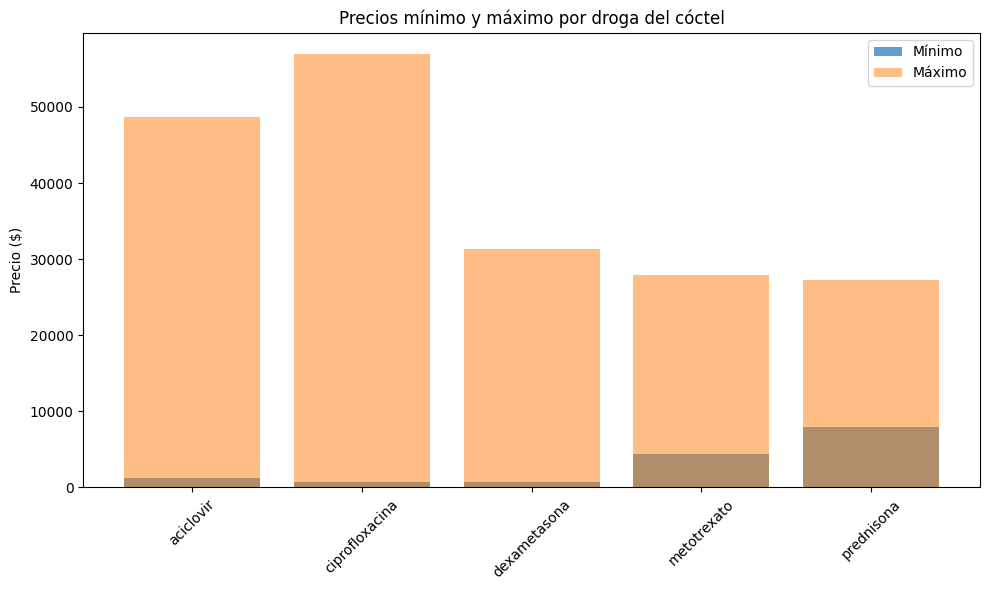

In [ ]:
#seguimos con la base de datos que no es de pami
df_complemento = pd.read_json(r'/content/drive/MyDrive/Labo/Material support /no_afiliados_complemento.json', orient='records', lines=True)
df_metotrexato = pd.read_json(r'/content/drive/MyDrive/Labo/Material support /no_afiliados_metotrexato.json', orient='records', lines=True)

# Unir en un solo dataframe
dfaa = pd.concat([df_complemento, df_metotrexato], ignore_index=True)

# --- LIMPIEZA DE PRECIOS ---
# Pasar todo a string
dfaa["PVP PAMI AL 01/09/2025"] = dfaa["PVP PAMI AL 01/09/2025"].astype(str)

# Quitar $, comas y espacios, y convertir a float
dfaa["PVP PAMI AL 01/09/2025"] = (
    dfaa["PVP PAMI AL 01/09/2025"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
    .astype(float)
)

# Lista de drogas del cóctel
cocktail = ["metotrexato", "aciclovir", "ciprofloxacina", "dexametasona", "prednisona"]

# Filtrar solo las drogas del cóctel
df_cocktail = dfaa[dfaa["PRINCIPIO ACTIVO"].str.lower().isin(cocktail)]

# Agrupar por droga y calcular min y max de PVP
resumen = df_cocktail.groupby("PRINCIPIO ACTIVO")["PVP PAMI AL 01/09/2025"].agg(["min", "max"]).reset_index()

# Calcular suma total mínima y máxima
costo_minimo = resumen["min"].sum()
costo_maximo = resumen["max"].sum()

# Mostrar resumen
print("Resumen precios del cóctel:")
print(resumen)
print(f"\nCosto total mínimo del cóctel: ${costo_minimo:,.2f}")
print(f"Costo total máximo del cóctel: ${costo_maximo:,.2f}")

# --- GRÁFICO ---
plt.figure(figsize=(10,6))
plt.bar(resumen["PRINCIPIO ACTIVO"], resumen["min"], label="Mínimo", alpha=0.7)
plt.bar(resumen["PRINCIPIO ACTIVO"], resumen["max"], label="Máximo", alpha=0.5)
plt.ylabel("Precio ($)")
plt.title("Precios mínimo y máximo por droga del cóctel")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El costo maximo del coctel es de 200USD a dia de hoy!!. Y si nos quedamos con el precio minimo representaria el 30% de la canasta basica total!! . Saquen sus conclusiones y debatamos al respecto, de la teoria vista hasta el momento.

Sigamos filtrando para ver cuantas empresas son las que manufacturan esos farmacos.

In [ ]:
df_labos=dfaa[["PRINCIPIO ACTIVO", "LABORATORIO"]]
df_labos.to_json(r'/content/drive/MyDrive/Labo/Material support /labos_cocktail.json', orient='records', lines=True)



In [ ]:

# Contar laboratorios únicos
cantidad = dfaa['LABORATORIO'].nunique()
print(f"🎯 Cantidad de laboratorios únicos: {cantidad}")

# Mostrar algunos detalles adicionales
print(f"📊 Total de registros: {len(dfaa)}")
print("\n🔝 Top 5 laboratorios con más registros:")
print(df['LABORATORIO'].value_counts().head())

🎯 Cantidad de laboratorios únicos: 33
📊 Total de registros: 106

🔝 Top 5 laboratorios con más registros:
LABORATORIO
Casasco      408
Elea         392
Siegfried    348
Bag¿         336
Baliarda     334
Name: count, dtype: int64


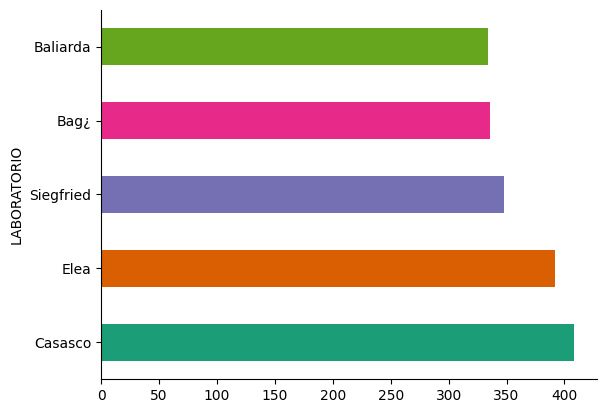

In [ ]:
df['LABORATORIO'].value_counts().head().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Si abrimos el coctel de remedios vemos que ya no es dominada por un duopolio, ahora se ve mas bien como un oligopolio.

In [ ]:
dfaa.to_excel(r'/content/drive/MyDrive/Labo/Material support /cocktail_limpio.xlsx', index=False)
dfaa.to_json(r'/content/drive/MyDrive/Labo/Material support /cocktail_limpio.json', orient='records', lines=True)

La conclusion es algo alarmante para nosotros, historicamente las farmaceuticas han sido firmas las cuales aprovechan la inelasticidad de sus productos y en las pocas manos que recae la produccion para sacar ventajas redituables.

Este ejercicio se podria agrandar para analizar un sujeto tipo, o de referencia analizando su edad y que tipo de remedios es el adecuado para calcular cuanto gastaria en promedio

Ademas, podriamos traerlo a dia de hoy actualizando por inflacion acumulada, y traer este ejemplo a dia de hoy.

Esta abierta la opcion para que investiguen para aquellos que les interese.



In [ ]:
#@title Easter egg 🥚
from IPython.display import Image
Image(url='https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaDdhejZsZ2doa3I4b2s2MWk3bHF6cmlyM3pxdmFqZXgwczlmeWk1cyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/NsDgJPXkk5CK7pPYkJ/giphy.gif')

Juandatorre.eco@gmail.com
